# PyPinch: a Python-based Pinch Analyser

PyPinch is a lightweight Python module that applies Pinch Technology principles, analysing a given set of stream data to find the Maximum Energy Recovery (MER) target.

### Input: 
A CSV set of stream data including:
- Stream Enthalpy CP (kW / ºC)
- Stream Supply Temperature ($T_S$)
- Stream Target Temperature ($T_T$)

And a minimum temperature difference $\Delta T_{min}$

### Output:
Currently, PyPinch can _calculate_, _plot_, and _export as CSV_ the following:
- The Temperature Interval Diagram
- The Problem Table
- The Heat Cascade
- The Minimum Cold Utility $Q_{Cmin}$ and the Minimum Hot Utility $Q_{Hmin}$
- The Pinch Point $T_{pinch}$
- The Shifted Temperature-Enthalpy Composite Diagram
- The Temperature-Enthalpy Composite Diagram
- The Grand Composite Curve

---

## Pinch Analysis or Heat Integration

Pinch analysis is a methodology for systematically finding optimum energy targets for a chemical plant. It analyses thermodynamically feasible maximum energy recovery (MER) targets for the available streams in a given plant, achieving them by optimising heat exchanger networks, energy supply methods and process operating conditions (Kemp, Ian, _Pinch Analysis and Process Integration, 2nd Edition_, 2016).

It is based on the idea that all streams in a chemical plant can be combined based on their temperature intervals into _composite curves_: one for the hot streams (the ones that lose heat) and one for the cold streams (the ones that gain heat). These composite curves provide insight into the point of closest approach (the _pinch point_) and the intervals available for heat exchange. Hence the required extra heating and cooling utilities can be found.

---

# Tutorial

This is a step-by-step approach to using the PyPinch module, explaining the steps along the way. A quicker approach is available in the "usage.py" file.

First, the PyPinch class is imported from the PyPinch.py file:

In [3]:
from PyPinch import PyPinch

The class is then instantiated, supplying the relative path of the _CSV stream datafile_.

Options can be supplied as a set:
- 'draw': draw Matplotlib-based plots
- 'csv': export the calculated data as CSV files
- 'debug': print the calculated data in the command-line

In [4]:
options = {'draw'}
pinch = PyPinch('./streams/streams.csv', options)

The _shiftTemperatures_ method is called to (guessed it) shift the supplied temperatures:
- Hot Streams ($T_S > T_T$) shift by $- \Delta T_{min} / 2$
- Cold Streams ($T_S < T_T$) shift by $+ \Delta T_{min} / 2$

The _constructTemperatureInterval_ method is called to... well, construct the Temperature Interval Diagram.
To print the in-memory plots, call _showPlots_.

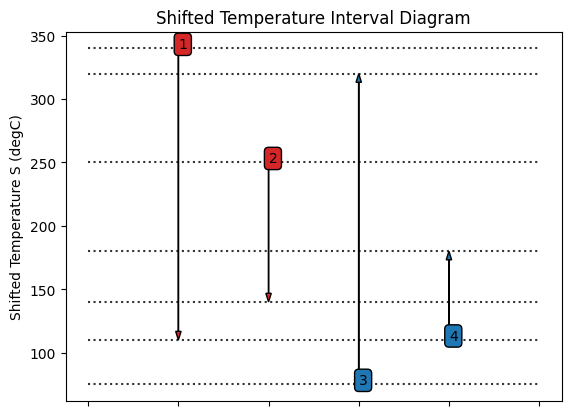

In [5]:
pinch.shiftTemperatures()
pinch.constructTemperatureInterval()
pinch.showPlots()

Based on each temperature interval, the associated enthalpy changed can be calculated as:
$\Delta H = \Delta CP \times \Delta S$

Where:
$\Delta CP = \Sigma CP_{HOT} - \Sigma CP_{COLD}$

All this can be summarised in a _Problem Table_, constructed using... some command.

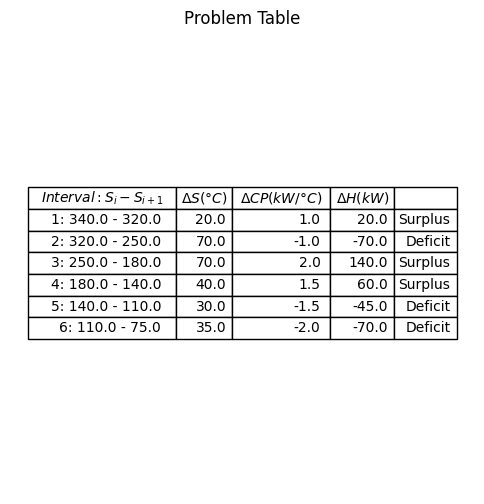

In [6]:
pinch.constructProblemTable()
pinch.showPlots()

Using the enthalpy change $\Delta H$ of each interval from the Problem Table, a Heat Cascade can be constructed. This depicts the available energy that can be passed down from each interval to the next.

Using the Heat Cascade, the Minimum Hot Utility $Q_{Hmin}$, Minimum Cold Utility $Q_{Cmin}$ and the Pinch Temperature $T_{PINCH}$ (the temperature at which the energy passed is zero).

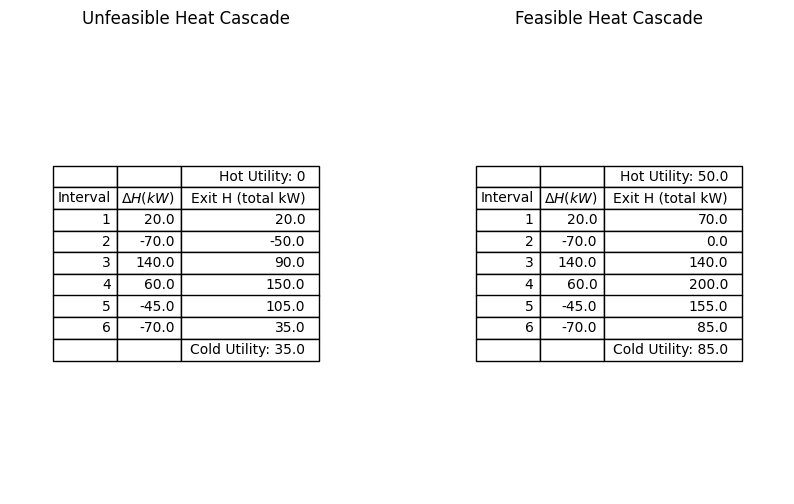

In [7]:
pinch.constructHeatCascade()
pinch.showPlots()

All Hot Streams and Cold Streams can be combined into Hot and Cold Composite Streams, respectively:

$\Delta H_{HOT} = CP_{HOT} \times \Delta T_i$
$\Delta H_{COLD} = CP_{COLD} \times \Delta T_i$

Where $CP_{HOT}$ is the sum of the Hot Streams' CPs on a given temperature interval $T_i$. Analog for $CP_{COLD}$.
Using this information, the Shifted Temperature-Enthalpy Composite Diagram can be constructed.

The minimum cold utility $Q_{Cmin}$ (kW) is shaded in blue, while the minimum hot utility $Q_{Hmin}$ is shaded in red. These areas correspond to the regions in which no heat exchange can take place: where the graphs do not superimpose. 

The Pinch point is the point of closest approach between the two composite curves. It is shown with a dotted line. The Pinch point Temperature $T_{pinch}$ corresponds to the one found in the Heat Cascade.

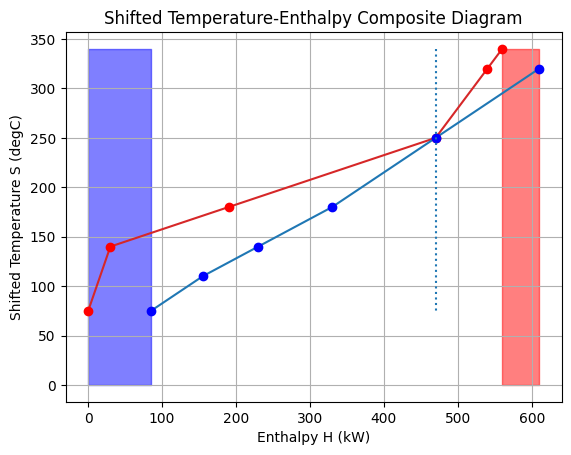

In [8]:
pinch.constructShiftedCompositeDiagram()
pinch.showPlots()

Based on the Shifted Composite diagram, the Actual Temperature-Enthalpy Composite Diagram can be constructed: the hot streams have their temperatures shifted up by $\Delta T_{min} / 2$ and the cold streams have their temperatures shifted down by $\Delta T_{min} / 2$. Note that this is the inverse operation from what was done in the beginning, upon calling the _shiftTemperatures_ method.

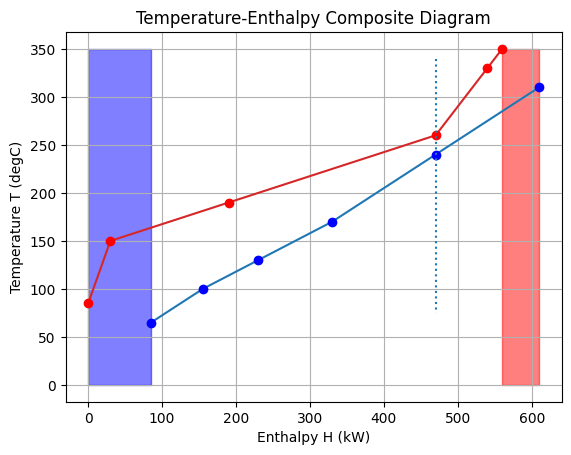

In [9]:
pinch.constructCompositeDiagram()
pinch.showPlots()

Based on the Net Enthalpy Change in each interval (depicted in the Problem Table), the Grand Composite Curve can be constructed. Therefore, it can be seen as the graphical representation of the Problem Table.

As before, the minimum cold utility $Q_{Cmin}$ (kW) is shaded in blue, while the minimum hot utility $Q_{Hmin}$ is shaded in red.

The Pinch Point corresponds to the point of zero net enthalpy change between two adjacent intervals. It is shown with a dotted line at the Pinch Temperature $T_{pinch}$.

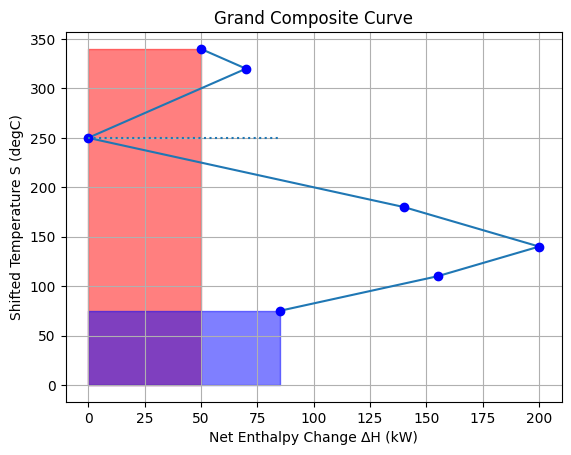

In [10]:
pinch.constructGrandCompositeCurve()
pinch.showPlots()

## Future Work

Based on the calculated energy requirements, a _Heat Exchanger network_ can be constructed which would achieve the maximum heat recovery. This would be based upon splitting the streams' energy changes above and below the Pinch Point, with no heat exchange over it.

If _energy relaxation_ is allowed (heat exchange over the Pinch Point), another Heat Exchanger network could be constructed which would reduce the number of heat exchanger units (and hence the Capital Cost) at the expense of larger Hot and Cold Utilities (and hence Running Costs). This reduction is only possible when there is a heat exchange loop over the Pinch.
